In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [2]:
# Read the data into a pandas DataFrame
with open('transactions_total_05-04-2023_14_29_26.txt', 'r') as f:
    data_list = eval(f.read())

In [3]:
# Format the data into two columns
data = pd.DataFrame(data_list, columns=['date', 'transactions'])
data['date'] = pd.to_datetime(data['date'], format='%m/%Y')

In [4]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%m/%Y')

In [5]:
print(data)

         date  transactions
0  2018-09-01      16056742
1  2017-06-01       7244657
2  2015-12-01        347092
3  2018-06-01      22471788
4  2015-08-01         85609
5  2018-08-01      19842059
6  2017-01-01       1409664
7  2017-09-01      10679242
8  2017-10-01      12602063
9  2017-08-01      10523178
10 2016-07-01       1356907
11 2016-12-01       1316131
12 2015-09-01        173805
13 2018-10-01      17056926
14 2018-01-01      33504270
15 2017-03-01       2426471
16 2018-12-01      17107601
17 2016-04-01       1023096
18 2018-11-01      16713911
19 2016-06-01       1351536
20 2016-01-01        404816
21 2016-03-01        917170
22 2018-03-01      20261862
23 2017-07-01       7835875
24 2018-02-01      22231978
25 2017-02-01       1410048
26 2016-02-01        520040
27 2016-10-01       1329847
28 2018-07-01      19937033
29 2015-10-01        205045
30 2015-11-01        234733
31 2017-12-01      26732085
32 2016-11-01       1301586
33 2016-09-01       1387412
34 2017-11-01      1

In [6]:
# Extract month and year from date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.strftime('%b')

# Specify the order of the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cat_type = CategoricalDtype(categories=month_order, ordered=True)
data['month'] = data['month'].astype(cat_type)

# Calculate total transactions per month
monthly_transactions = data.groupby(['year', 'month'])['transactions'].sum().reset_index()

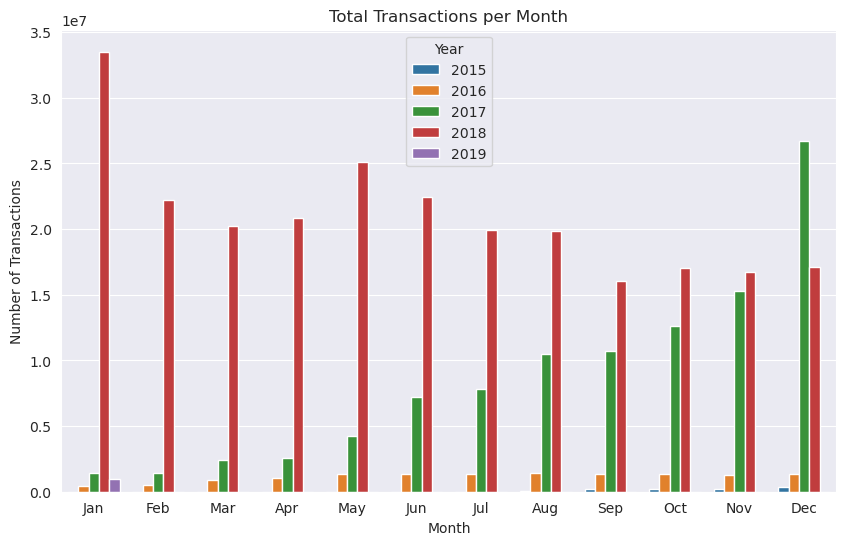

In [7]:
# Create a bar plot
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='transactions', hue='year', data=monthly_transactions)
plt.title('Total Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Year')
plt.show()